In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("OpenSea 1M Transaction.csv")
df

,collection_name,collection_url,asset_id,asset_name,asset_description,asset_contract_date,asset_url,asset_img_url,event_time,event_auction_type,event_contract_address,event_quantity,event_payment_symbol,event_total_price
0,IRL Psychedelics Anonymous Pass,https://opensea.io/collection/irl-psychedelics...,161945500,IRL Psychedelics Anonymous Pass #1398,The IRL Psychedelics Anonymous Pass grants hol...,2021-12-22T06:16:17.857676,https://opensea.io/assets/0x92aa4c9a4f54fe95d0...,https://lh3.googleusercontent.com/w5TfKQhCADag...,2022-02-18T20:00:08.231558,NaN,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1.0,ETH,0.26
1,Clementines Nightmare,https://opensea.io/collection/official-clement...,298970099,Jack Carver #1952,NaN,2022-02-17T08:50:46.879346,https://opensea.io/assets/0x5c3cc8d8f5c2186d07...,https://lh3.googleusercontent.com/l5O6CT14dCkR...,2022-02-18T20:00:08.220650,NaN,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1.0,ETH,1.15
2,STAPLEVERSE - FEED CLAN - PHASE 1 of 3,https://opensea.io/collection/stapleverse-feed...,204296780,Pretzel #337/344 - FEED,Where’s the mustard?\n///calls.corn.means,2022-01-12T16:53:30.193032,https://opensea.io/assets/0x8ee9a60cb5c0e7db41...,https://openseauserdata.com/files/c2523f22d14a...,2022-02-18T20:00:08.142147,NaN,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1.0,ETH,0.4989
3,Little Lemon Friends,https://opensea.io/collection/little-lemon-fri...,143899507,Little Lemon #5256,"9,999 Little lemons that fell from the giant l...",2021-12-09T05:47:14.426894,https://opensea.io/assets/0x0b22fe0a2995c5389a...,https://lh3.googleusercontent.com/8Mlx2BXhJx3D...,2022-02-18T20:00:08.123047,NaN,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1.0,ETH,0.348748
4,SkuxxVerse Pass,https://opensea.io/collection/skuxxversepass,294834851,#2979,Skuxxverse is a unique metaverse project which...,2022-01-17T11:32:52.007276,https://opensea.io/assets/0x19350eb381ab2f88d2...,https://lh3.googleusercontent.com/_nu93Uz9VUAp...,2022-02-18T20:00:07.889714,NaN,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1.0,ETH,0.279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048569,CyberFrogz,https://opensea.io/collection/cyberfrogz,305937631,Cyber Frogz #792,Cyber Frogz is a community driven project for ...,2022-02-22T01:45:25.400788,https://opensea.io/assets/0xdccc916bf4a0186065...,https://lh3.googleusercontent.com/wtwkmWd5Y4yh...,2022-02-22T06:32:35.121721,NaN,0x7f268357a8c2552623316e2562d90e642bb538e5,1,ETH,0.35
1048570,Terraforms by Mathcastles,https://opensea.io/collection/terraforms,153519096,"Level 13 at {47, 35}",Terraforms by Mathcastles. Onchain land art fr...,2021-12-17T13:58:44.154480,https://opensea.io/assets/0x4e1f41613c9084fdb9...,https://openseauserdata.com/files/5c6df7539dfe...,2022-02-22T06:32:34.934175,NaN,0x7f268357a8c2552623316e2562d90e642bb538e5,1,ETH,0.79
1048571,METAKAYS,https://opensea.io/collection/metakays,305388386,METAKAYS-2053,NaN,2022-02-19T03:45:24.548034,https://opensea.io/assets/0xb4a4961eddeded48ca...,https://openseauserdata.com/files/7aee17341c38...,2022-02-22T06:32:34.853358,NaN,0x7f268357a8c2552623316e2562d90e642bb538e5,1,ETH,0.094
1048572,Divine Anarchy,https://opensea.io/collection/divineanarchy,91392317,#9300,[Divine Anarchy](https://www.divineanarchy.com),2021-11-05T08:10:25.130944,https://opensea.io/assets/0xc631164b6cb1340b51...,https://lh3.googleusercontent.com/E4oDYIc8HxeT...,2022-02-22T06:32:34.834263,NaN,0x7f268357a8c2552623316e2562d90e642bb538e5,1,ETH,0.18


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048574 entries, 0 to 1048573
Data columns (total 14 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   collection_name         1048260 non-null  object
 1   collection_url          941668 non-null   object
 2   asset_id                937012 non-null   object
 3   asset_name              905907 non-null   object
 4   asset_description       746557 non-null   object
 5   asset_contract_date     936904 non-null   object
 6   asset_url               936891 non-null   object
 7   asset_img_url           936108 non-null   object
 8   event_time              936887 non-null   object
 9   event_auction_type      1008 non-null     object
 10  event_contract_address  936882 non-null   object
 11  event_quantity          936873 non-null   object
 12  event_payment_symbol    936872 non-null   object
 13  event_total_price       936868 non-null   object
dtypes: object(14)
memo

## Explanation of Columns in Your Dataset
- dataset contains 13 columns, which represent different attributes of digital assets and their transactions. Here’s a breakdown of each column:


1. `collection_name`:-	      Name of the asset collection (e.g., a group of NFTs under the same project).
2. `collection_url`:-	      Web link to the collection’s official page.
3. `asset_id`:-	              Unique identifier for each asset (may be repeated if assets are resold).
4. `asset_name`:-	          Name of the asset (e.g., "CryptoPunk #1234").
5. `asset_description`:-	  Text description of the asset, if available.
6. `asset_contract_date`:-	  The date when the asset was first created or added to the blockchain.
7. `asset_url`:-	          Web link to the asset’s details.
8. `asset_img_url`:-	      Link to the image representing the asset.
9. `event_time`:-	          Timestamp of the event (sale or auction).
10. `event_auction_type`:-	  Type of auction (e.g., English auction, Dutch auction).
11. `event_contract_address`:-Blockchain contract address for the transaction.
12. `event_quantity`:-	      Number of assets sold in the transaction.
13. `event_total_price`:-	  Total price paid for the asset(s) in the transaction.

In [4]:
# change the datatype into datetime because these "asset_contract_date", "event_time" columns are containing date time data
df[["asset_contract_date", "event_time"]] = df[["asset_contract_date", "event_time"]].apply(pd.to_datetime,errors = 'coerce')

In [5]:
# Change the datatype into numeric becasue event_quantity","event_total_price" columns are contaning numeric value.
df[["event_quantity","event_total_price"]] = df[["event_quantity","event_total_price"]].apply(pd.to_numeric,errors = 'coerce')

In [6]:
df.columns

Index(['collection_name', 'collection_url', 'asset_id', 'asset_name',
       'asset_description', 'asset_contract_date', 'asset_url',
       'asset_img_url', 'event_time', 'event_auction_type',
       'event_contract_address', 'event_quantity', 'event_payment_symbol',
       'event_total_price'],
      dtype='object')

In [29]:
min_date = df["event_time"].min()
max_date = df["event_time"].max()

# Print results
print(f"Date range of data: {min_date.date()} to {max_date.date()}")

Date range of data: 2022-02-01 to 2022-02-22


In [30]:
# we have the data for only 1 month

In [7]:
df.duplicated().sum()

np.int64(22769)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.isnull().sum()

collection_name                 1
collection_url              94453
asset_id                    95397
asset_name                 126251
asset_description          283663
asset_contract_date         95500
asset_url                   95479
asset_img_url               96260
event_time                  95507
event_auction_type        1024819
event_contract_address      95489
event_quantity              95506
event_payment_symbol        95498
event_total_price           95507
dtype: int64

In [10]:
# here i am removing only the null value only for the collection name
df.dropna(subset=["collection_name"], inplace= True)

In [11]:
df.head()

,collection_name,collection_url,asset_id,asset_name,asset_description,asset_contract_date,asset_url,asset_img_url,event_time,event_auction_type,event_contract_address,event_quantity,event_payment_symbol,event_total_price
0,IRL Psychedelics Anonymous Pass,https://opensea.io/collection/irl-psychedelics...,161945500,IRL Psychedelics Anonymous Pass #1398,The IRL Psychedelics Anonymous Pass grants hol...,2021-12-22 06:16:17.857676,https://opensea.io/assets/0x92aa4c9a4f54fe95d0...,https://lh3.googleusercontent.com/w5TfKQhCADag...,2022-02-18 20:00:08.231558,NaN,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1.0,ETH,0.260000
1,Clementines Nightmare,https://opensea.io/collection/official-clement...,298970099,Jack Carver #1952,NaN,2022-02-17 08:50:46.879346,https://opensea.io/assets/0x5c3cc8d8f5c2186d07...,https://lh3.googleusercontent.com/l5O6CT14dCkR...,2022-02-18 20:00:08.220650,NaN,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1.0,ETH,1.150000
2,STAPLEVERSE - FEED CLAN - PHASE 1 of 3,https://opensea.io/collection/stapleverse-feed...,204296780,Pretzel #337/344 - FEED,Where’s the mustard?\n///calls.corn.means,2022-01-12 16:53:30.193032,https://opensea.io/assets/0x8ee9a60cb5c0e7db41...,https://openseauserdata.com/files/c2523f22d14a...,2022-02-18 20:00:08.142147,NaN,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1.0,ETH,0.498900
3,Little Lemon Friends,https://opensea.io/collection/little-lemon-fri...,143899507,Little Lemon #5256,"9,999 Little lemons that fell from the giant l...",2021-12-09 05:47:14.426894,https://opensea.io/assets/0x0b22fe0a2995c5389a...,https://lh3.googleusercontent.com/8Mlx2BXhJx3D...,2022-02-18 20:00:08.123047,NaN,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1.0,ETH,0.348748
4,SkuxxVerse Pass,https://opensea.io/collection/skuxxversepass,294834851,#2979,Skuxxverse is a unique metaverse project which...,2022-01-17 11:32:52.007276,https://opensea.io/assets/0x19350eb381ab2f88d2...,https://lh3.googleusercontent.com/_nu93Uz9VUAp...,2022-02-18 20:00:07.889714,NaN,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1.0,ETH,0.279000


In [12]:
unique_payment_symbols = pd.DataFrame(df['event_payment_symbol'].unique(), columns=['Unique_Payment_Symbols'])
unique_payment_symbols

,Unique_Payment_Symbols
0,ETH
1,NaN
2,inventor of the printing press Marco Polo
3,0.315
4,0.11
5,who have accumulated (and continue to accumul...
6,Ango-Sat-2 was about 60% ready. The officials...
7,on 23 March 2016
8,there is a small Brazilian community of about 5
9,and other languages by 4.1%.[140]


In [11]:
df.drop(columns= ["event_payment_symbol"], inplace= True)

In [12]:
#How many unique NFT collections exist, and which are the most popular? (Bar chart of collection_name vs. count of transactions)
df["collection_name"].nunique()

107943

In [13]:
df["collection_name"].value_counts().head(10)

collection_name
CryptoShibes             12656
Kawaii Skull              9334
Dooggies                  8631
The Long Lost             7474
Candy Hunters             7125
Gooniez Gang Official     7073
T-O-S The Other Side      6967
0xZuki                    6963
Edenhorde                 6872
Cosmic Cats Official      6801
Name: count, dtype: int64

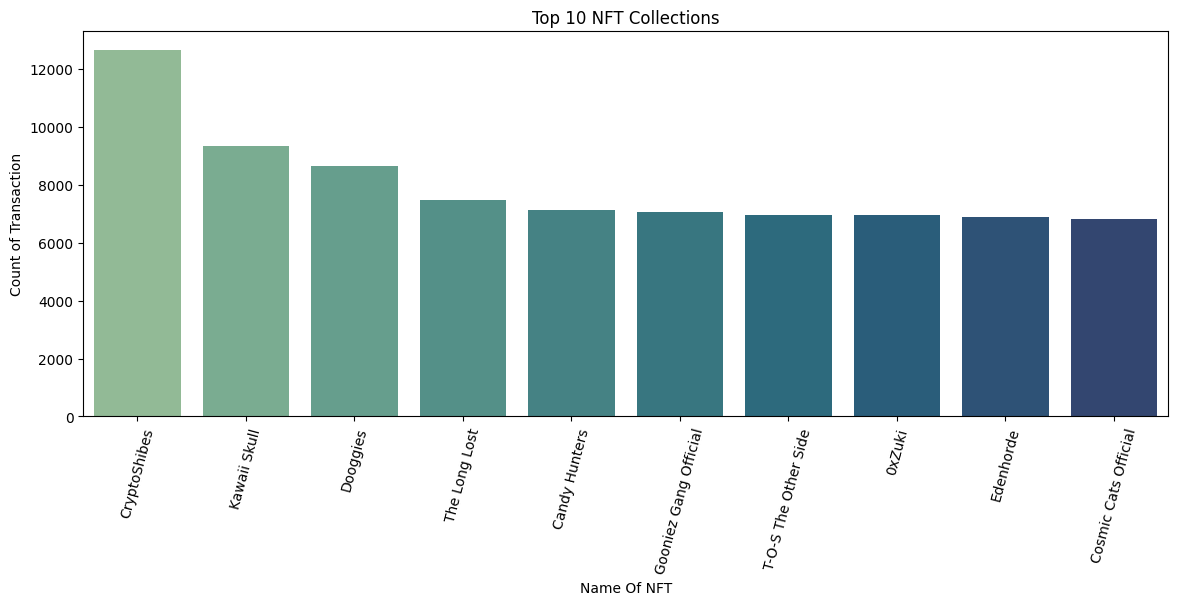

In [14]:
plt.figure(figsize=(14,5))
sns.barplot(df["collection_name"].value_counts().head(10), palette= "crest")
plt.title("Top 10 NFT Collections")
plt.ylabel("Count of Transaction")
plt.xlabel("Name Of NFT")
plt.xticks(rotation=75)
plt.show()

In [18]:
#How many transactions have an event_total_price of zero?
(df['event_total_price'] == 0).sum()

np.int64(3818)

## 2. Collection Analysis
- What are the top 10 most frequently appearing collections? (Bar Chart, Treemap) Done
- What are the rarest collections (least frequent entries)? (Bar Chart, Treemap) DONE
- Do collections with more assets also have more transactions? (Scatter Plot, Regression Line) DONE
- Are there collections with very high or very low average asset prices? (Box Plot, Violin Plot) REMOVE
- What percentage of collections have missing descriptions? (Pie Chart, Bar Chart) REMOVE
  

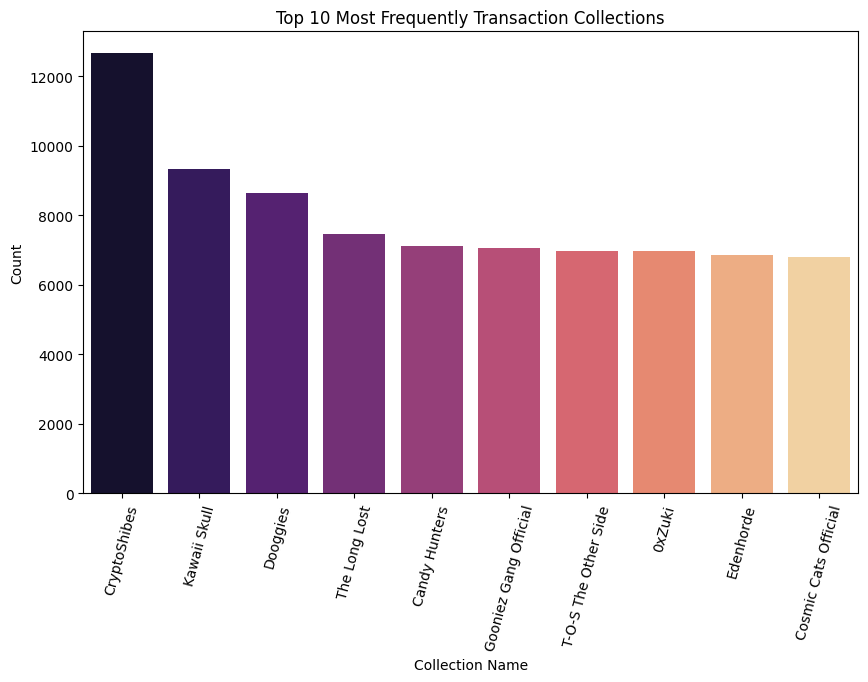

In [19]:
#What are the top 10 most frequently appearing collections? create a bar graph?
plt.figure(figsize=(10,6))
sns.barplot(df["collection_name"].value_counts().head(10), palette= "magma")
plt.ylabel("Count")
plt.xlabel("Collection Name")
plt.title("Top 10 Most Frequently Transaction Collections")
plt.xticks(rotation = 75)
plt.show()

In [20]:
#What are the rarest collections (least frequent entries)? 
df["collection_name"].value_counts().tail(10)

collection_name
aethre                            1
SHOCKER TOOTH                     1
APEVERSE | Rise Of The Mutants    1
Mixed Editions                    1
Maxwells                          1
The Sadder Bears                  1
Rare Liquid Society               1
Depressed Monsters                1
Where time runs differently       1
desperate ap0ewives               1
Name: count, dtype: int64

In [21]:
df[df['collection_name'] == 'Where time runs differently']['asset_url'][1031411]

'https://opensea.io/assets/0x495f947276749ce646f68ac8c248420045cb7b5e/13711141500574226808496834430715780064866283704555247304211411128586235543553'

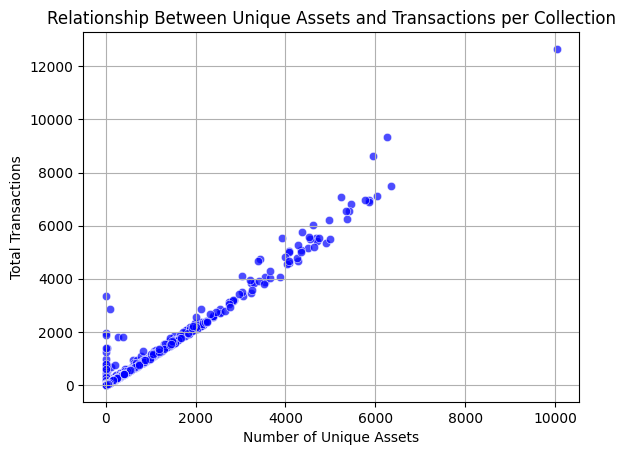

In [22]:
# Do collections with more assets also have more transactions?
collection_stats = df.groupby("collection_name").agg( unique_asset = ("asset_id", "nunique"),
                                   total_transaction = ("asset_id", "count")).reset_index()

sns.scatterplot(x = collection_stats["unique_asset"],
                y = collection_stats["total_transaction"],
               alpha=0.7, color='blue')
plt.xlabel("Number of Unique Assets")
plt.ylabel("Total Transactions")
plt.title("Relationship Between Unique Assets and Transactions per Collection")
plt.grid(True)
plt.show()

## 3. Asset Analysis
- What percentage of assets are missing names? (Pie Chart, Bar Chart) DONE
- Do certain collections have assets with very long descriptions? (Histogram, Box Plot) REMOVE
- What are the top 10 most expensive assets? (Table Summary, Bar Chart) DONE
- Are there assets that appear multiple times under different IDs? (Duplicate Check, Bar Chart) REMOVE

## plot collection with avg asset price, find the top 10 collection_name

In [23]:
## plot collection with avg asset price,
df.groupby("collection_name")["event_total_price"].mean().sort_values(ascending=False).reset_index().head(10)

,collection_name,event_total_price
0,Bored Ape Yacht Club,112.836930
1,CryptoPunks,103.466129
2,Nouns,85.666667
3,The Nonexistent Night Travel Of Ghosts,69.000000
4,Where My Vans Go,56.000000
5,Reddit CryptoSnoos,42.000000
6,Squiggly,38.333333
7,Ringers by Dmitri Cherniak,37.000000
8,Bored Ape Chemistry Club,31.911480
9,NeoTokyo Citizens,30.519333


In [24]:
avg_asset_price = df.groupby("collection_name")["event_total_price"].mean().sort_values(ascending=False).reset_index().head(10)
avg_asset_price = round(avg_asset_price,2)
avg_asset_price

,collection_name,event_total_price
0,Bored Ape Yacht Club,112.84
1,CryptoPunks,103.47
2,Nouns,85.67
3,The Nonexistent Night Travel Of Ghosts,69.00
4,Where My Vans Go,56.00
5,Reddit CryptoSnoos,42.00
6,Squiggly,38.33
7,Ringers by Dmitri Cherniak,37.00
8,Bored Ape Chemistry Club,31.91
9,NeoTokyo Citizens,30.52


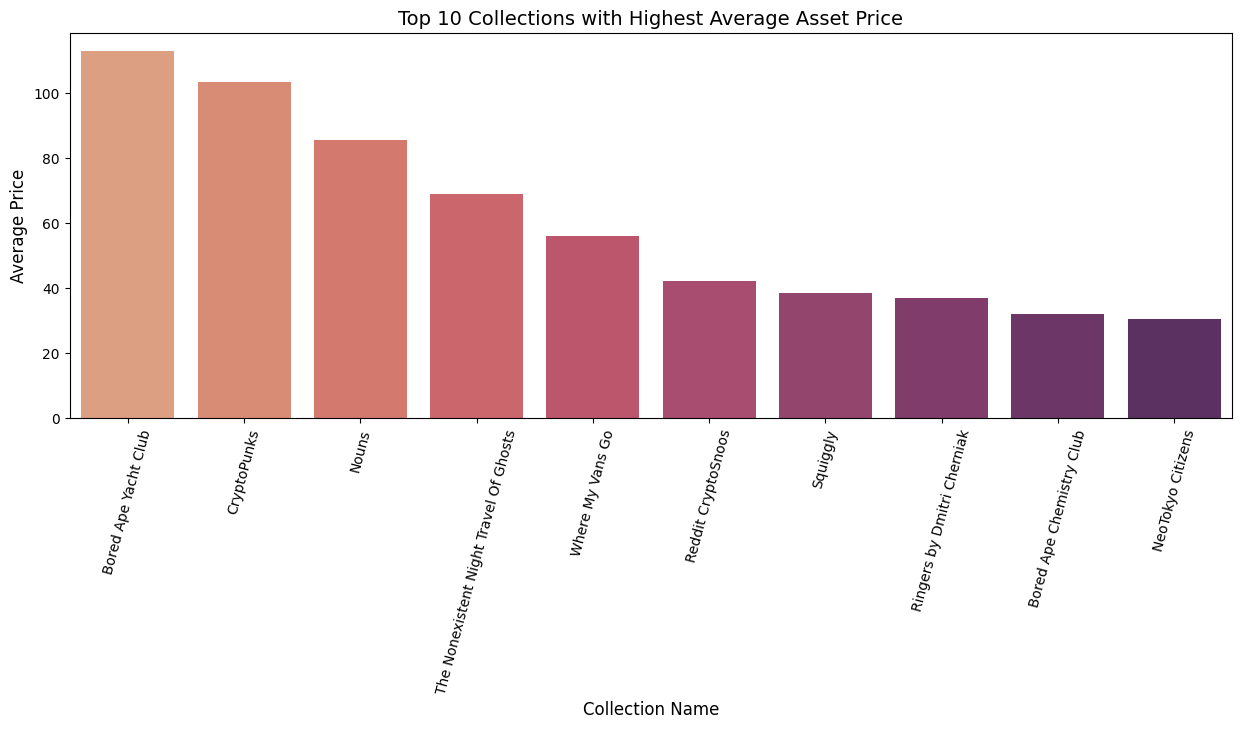

In [25]:
plt.figure(figsize=(15,5))
sns.barplot(x = avg_asset_price["collection_name"],
            y = avg_asset_price["event_total_price"],
            palette = "flare")
plt.title("Top 10 Collections with Highest Average Asset Price", fontsize=14)
plt.xlabel("Collection Name", fontsize = 12)
plt.ylabel("Average Price", fontsize = 12)
plt.xticks(rotation = 75)
plt.show()

In [26]:
df["collection_name"].value_counts().head(10)

collection_name
CryptoShibes             12656
Kawaii Skull              9334
Dooggies                  8631
The Long Lost             7474
Candy Hunters             7125
Gooniez Gang Official     7073
T-O-S The Other Side      6967
0xZuki                    6963
Edenhorde                 6872
Cosmic Cats Official      6801
Name: count, dtype: int64

In [27]:
df["asset_name"].isnull().sum()

np.int64(126250)

In [28]:
len(df["asset_name"])

1025804

In [29]:
df["asset_name"].nunique()

664109

In [30]:
df["asset_name"].count()

np.int64(899554)

In [16]:
# What are the top 10 most expensive assets?
most_expensive_asset = df.sort_values( by = "event_total_price", ascending=False)

In [17]:
most_expensive_asset.dropna(subset="asset_name", inplace=True)

In [18]:
most_expensive_asset = most_expensive_asset.head(10)

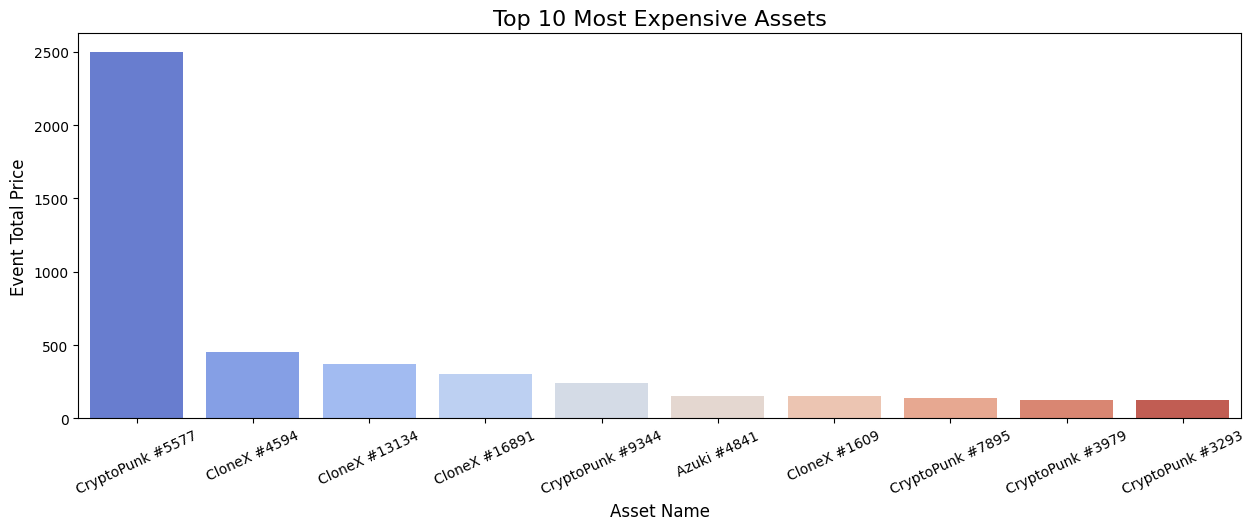

In [19]:
plt.figure(figsize=(15,5))
sns.barplot(x = most_expensive_asset["asset_name"], y = most_expensive_asset["event_total_price"],
            palette='coolwarm')
plt.xlabel("Asset Name", fontsize = 12)
plt.ylabel("Event Total Price", fontsize = 12)
plt.title("Top 10 Most Expensive Assets", fontsize = 16)
plt.xticks(rotation = 25)
plt.show()

In [20]:
df.columns

Index(['collection_name', 'collection_url', 'asset_id', 'asset_name',
       'asset_description', 'asset_contract_date', 'asset_url',
       'asset_img_url', 'event_time', 'event_auction_type',
       'event_contract_address', 'event_quantity', 'event_total_price'],
      dtype='object')

In [21]:
df['event_time']

0         2022-02-18 20:00:08.231558
1         2022-02-18 20:00:08.220650
2         2022-02-18 20:00:08.142147
3         2022-02-18 20:00:08.123047
4         2022-02-18 20:00:07.889714
                     ...            
1048569   2022-02-22 06:32:35.121721
1048570   2022-02-22 06:32:34.934175
1048571   2022-02-22 06:32:34.853358
1048572   2022-02-22 06:32:34.834263
1048573   2022-02-22 06:32:34.917656
Name: event_time, Length: 1025804, dtype: datetime64[ns]

### what are the months or weeks or days where more sales happen
### which day asset price is high
### find the expensive asset and show how it's price got changes over the period of time

In [31]:

df["day"] = df["event_time"].dt.day_name()
daily_sales = df["day"].value_counts().sort_index()
print("\nDaily Sales:\n", daily_sales)


Daily Sales:
 day
Friday       115393
Monday       195906
Saturday     156440
Sunday        97791
Thursday      89853
Tuesday      119561
Wednesday    155354
Name: count, dtype: int64


<Axes: xlabel='day'>

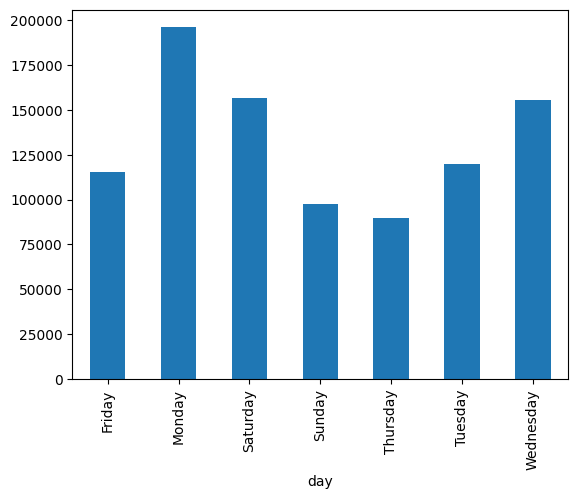

In [32]:
daily_sales.plot(kind="bar")

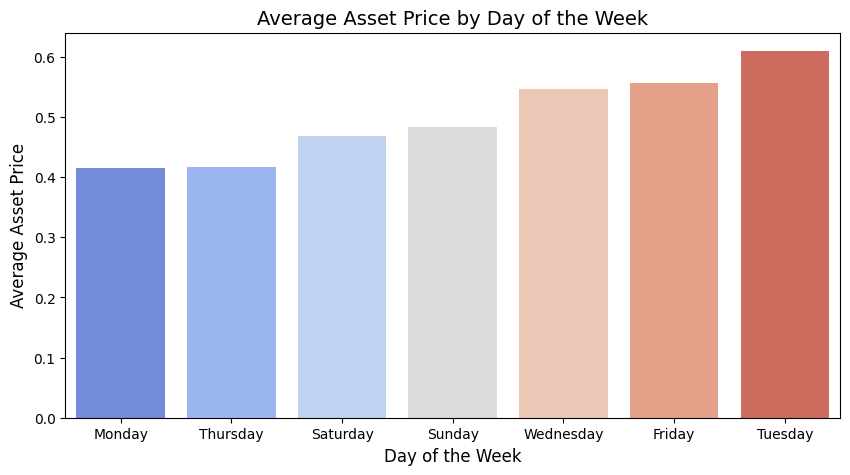

In [33]:


avg_price_by_day = df.groupby("day")["event_total_price"].mean().sort_values()
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_price_by_day.index, y=avg_price_by_day.values, palette="coolwarm")

# Labels and title
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Average Asset Price", fontsize=12)
plt.title("Average Asset Price by Day of the Week", fontsize=14)

plt.show()

## 8. URL & Image Data Quality
- How many assets are missing image URLs (asset_img_url)?
- Are there duplicate image URLs across different assets?
- What percentage of assets have broken URLs? (Pie Chart)

In [45]:
#How many assets are missing image URLs (asset_img_url)? (Pie Chart, Bar Chart)
missing_images = df["asset_img_url"].isna().sum()
available_images = df["asset_img_url"].notna().sum()

# Print summary
print(f"Missing Image URLs: {missing_images}")
print(f"Available Image URLs: {available_images}")

Missing Image URLs: 96259
Available Image URLs: 929545


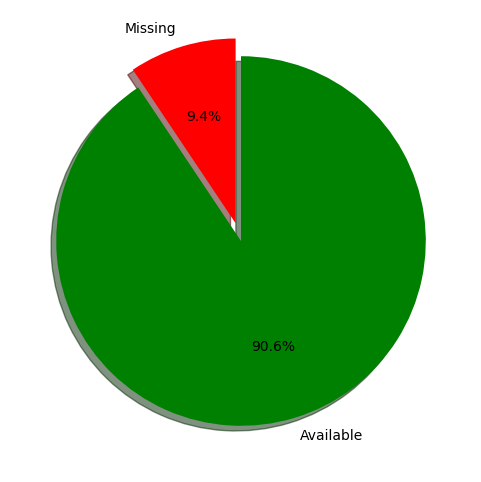

In [46]:
image_data = {"Missing": missing_images, "Available": available_images}
plt.figure(figsize=(6, 6))
plt.pie(image_data.values(), labels=image_data.keys(), autopct="%1.1f%%", 
        colors=["red", "green"], startangle=90, explode=(0.1, 0), shadow=True)
plt.show()

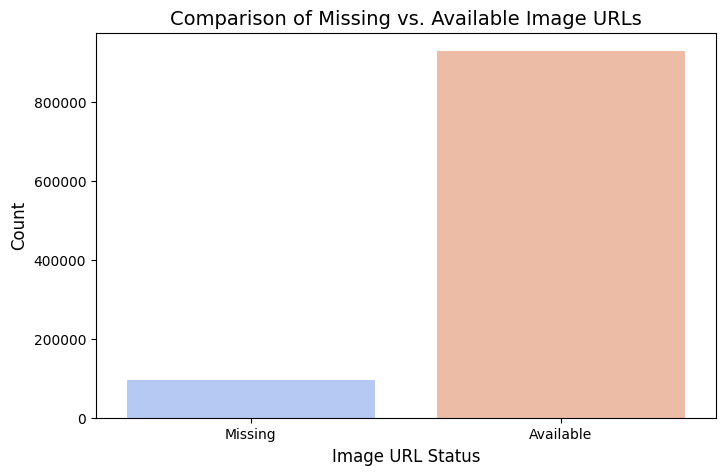

In [47]:
image_data = {"Missing": missing_images, "Available": available_images}
plt.figure(figsize=(8, 5))
sns.barplot(x=list(image_data.keys()), y=list(image_data.values()), palette="coolwarm")
plt.xlabel("Image URL Status", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Comparison of Missing vs. Available Image URLs", fontsize=14)
plt.show()